In [147]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 16, 'figure.figsize': (10, 6)})

In [148]:
# Defining the differential equation

def func(x,y):
    return (y**2 +1)

# Defining the exact solution

def exact_y(x):
    return np.tan(x)

In [149]:
# Defining Euler Method
def euler(x0,y0,h,n_step,func):
    x = [x0]
    y = [y0]

    for i in range(n_step):
        y_new = y0 + h * func(x0,y0)
        x_new = x0 + h
        x0 = x_new
        y0 = y_new
        x.append(x_new)
        y.append(y_new)

    return x,y

In [150]:
# Defining RK4 Method

def rk4(x0,y0,h,n_steps,func):
    x = [x0]
    y = [y0]

    for i in range(n_steps):
        k1 = func(x0,y0)
        k2 = func(x0 + (0.5 * h), y0 + (0.5 * h * k1))
        k3 = func(x0 + (0.5 * h), y0 + (0.5 * h * k2))
        k4 = func(x0 + h, y0 + (h * k3))
        y_new = y0 + (h/6) * (k1 + (2*k2) + (2*k3) + k4)
        x_new = x0 + h
        x0 = x_new
        y0 = y_new
        x.append(x_new)
        y.append(y_new)
    return x,y

Comparison Table
________________________________________________________________________________
       x        Euler          RK4        Exact    Err_Euler      Err_RK4
________________________________________________________________________________
   0.000     0.000000     0.000000     0.000000     0.00e+00     0.00e+00
   0.100     0.100000     0.100335     0.100335     3.35e-04     8.30e-08
   0.200     0.201000     0.202710     0.202710     1.71e-03     1.57e-07
   0.300     0.305040     0.309336     0.309336     4.30e-03     2.10e-07
   0.400     0.414345     0.422793     0.422793     8.45e-03     2.26e-07
   0.500     0.531513     0.546302     0.546302     1.48e-02     1.82e-07
   0.600     0.659764     0.684137     0.684137     2.44e-02     5.17e-08
   0.700     0.803293     0.842289     0.842288     3.90e-02     1.89e-07
   0.800     0.967821     1.029639     1.029639     6.18e-02     5.04e-07
   0.900     1.161488     1.260159     1.260158     9.87e-02     5.65e-07
   1.00

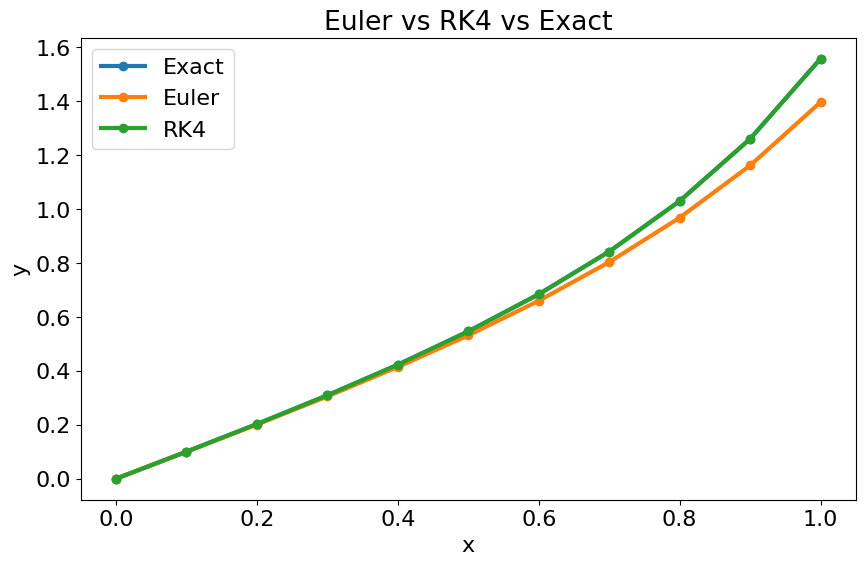

In [191]:
x0 = 0
y0 = 0
xf = 1
n=10
h = (xf - x0)/n
x1 = np.linspace(x0,xf,n+1)
x2,y2 = euler(x0,y0,h,n,func)
x3,y3 = rk4(x0,y0,h,n,func)

print("Comparison Table")
print("_"*80)
print(f"{'x':>8} {'Euler':>12} {'RK4':>12} {'Exact':>12} {'Err_Euler':>12} {'Err_RK4':>12}")
print("_"*80)
for i in range(len(x1)):
    print(f"{x1[i]:>8.3f} {y2[i]:>12.6f} {y3[i]:>12.6f} {exact_y(x2[i]):>12.6f} {abs(y2[i]-exact_y(x2[i])):>12.2e} {abs(y3[i]-exact_y(x3[i])):>12.2e}")

plt.plot(x1, exact_y(x1), '-o',label='Exact',linewidth = 3)
plt.plot(x2, y2, '-o', label='Euler',linewidth = 3)
plt.plot(x3, y3,'-o', label='RK4',linewidth = 3)
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Euler vs RK4 vs Exact")
plt.show()


Comparison Table
________________________________________________________________________________
       x        Euler          RK4        Exact    Err_Euler      Err_RK4
________________________________________________________________________________
   0.000     0.000000     0.000000     0.000000     0.00e+00     0.00e+00
   0.015     0.015500     0.015501     0.015501     1.24e-06     7.45e-12
   0.031     0.031004     0.031010     0.031010     6.21e-06     1.49e-11
   0.046     0.046519     0.046534     0.046534     1.49e-05     2.23e-11
   0.062     0.062052     0.062080     0.062080     2.74e-05     2.96e-11
   0.077     0.077612     0.077656     0.077656     4.37e-05     3.68e-11
   0.093     0.093205     0.093269     0.093269     6.38e-05     4.39e-11
   0.108     0.108840     0.108928     0.108928     8.79e-05     5.09e-11
   0.124     0.124523     0.124639     0.124639     1.16e-04     5.77e-11
   0.140     0.140264     0.140412     0.140412     1.48e-04     6.42e-11
   0.15

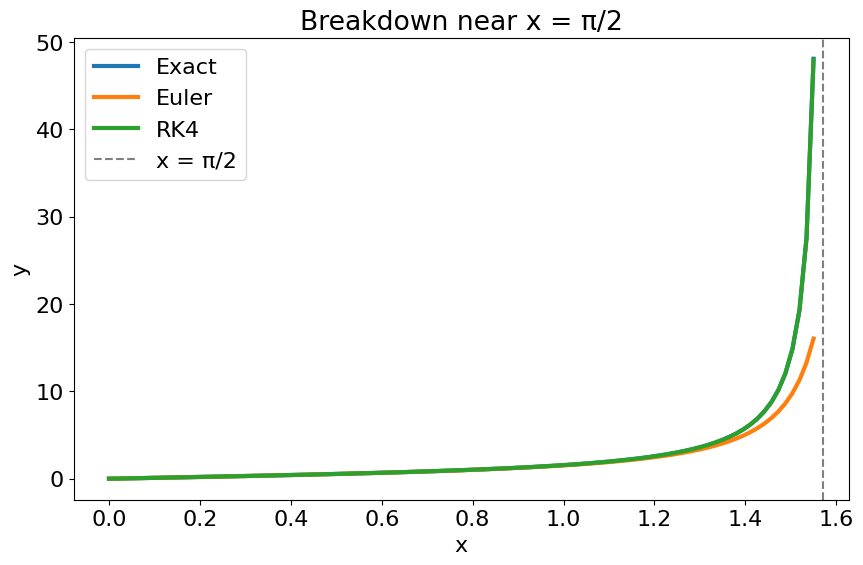

In [193]:
x0 = 0
y0 = 0
xf = 1.55
n=100
h = (xf - x0)/n

x1 = np.linspace(x0,xf,n+1)
x2,y2 = euler(x0,y0,h,n,func)
x3,y3 = rk4(x0,y0,h,n,func)

print("Comparison Table")
print("_"*80)
print(f"{'x':>8} {'Euler':>12} {'RK4':>12} {'Exact':>12} {'Err_Euler':>12} {'Err_RK4':>12}")
print("_"*80)
for i in range(len(x1)):
    print(f"{x1[i]:>8.3f} {y2[i]:>12.6f} {y3[i]:>12.6f} {exact_y(x2[i]):>12.6f} {abs(y2[i]-exact_y(x2[i])):>12.2e} {abs(y3[i]-exact_y(x3[i])):>12.2e}")

plt.plot(x1, exact_y(x1), label='Exact',linewidth = 3)
plt.plot(x2, y2, label='Euler',linewidth = 3)
plt.plot(x3, y3, label='RK4',linewidth = 3)
plt.axvline(np.pi/2, color='gray', linestyle='--', label='x = π/2')
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Breakdown near x = π/2")
plt.show()


h=0.2  Euler: 1.294131  RK4: 1.557352  Exact: 1.557408  Err_Euler: 2.63e-01  Err_RK4: 5.60e-05
h=0.1  Euler: 1.396394  RK4: 1.557406  Exact: 1.557408  Err_Euler: 1.61e-01  Err_RK4: 1.28e-06
h=0.05  Euler: 1.466347  RK4: 1.557408  Exact: 1.557408  Err_Euler: 9.11e-02  Err_RK4: 3.48e-08
h=0.01  Euler: 1.536977  RK4: 1.557408  Exact: 1.557408  Err_Euler: 2.04e-02  Err_RK4: 2.49e-10


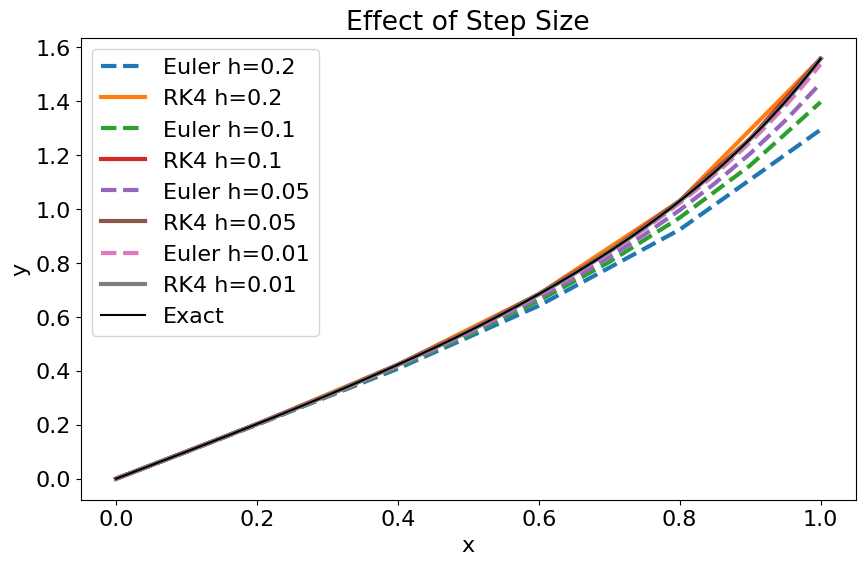

In [205]:
h_list = [0.2, 0.1, 0.05, 0.01]
x0=0 
y0=0 
xf=1

for h in h_list:
    n = int((xf - x0)/h)
    x2, y2 = euler(x0, y0, h, n, func)
    x3, y3 = rk4(x0, y0, h, n, func)
    plt.plot(x2, y2, '--', label=f'Euler h={h}',linewidth=3)
    plt.plot(x3, y3, label=f'RK4 h={h}',linewidth=3)
    print(f"h={h}  Euler: {y2[-1]:.6f}  RK4: {y3[-1]:.6f}  Exact: {exact_y(xf):.6f}  Err_Euler: {abs(y2[-1]-exact_y(xf)):.2e}  Err_RK4: {abs(y3[-1]-exact_y(xf)):.2e}")


x_exact = np.linspace(x0, xf, 1000)
plt.plot(x_exact, exact_y(x_exact), 'k-', label='Exact')
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Effect of Step Size")
plt.show()

Euler slope: 1.02
RK4 slope: 3.89


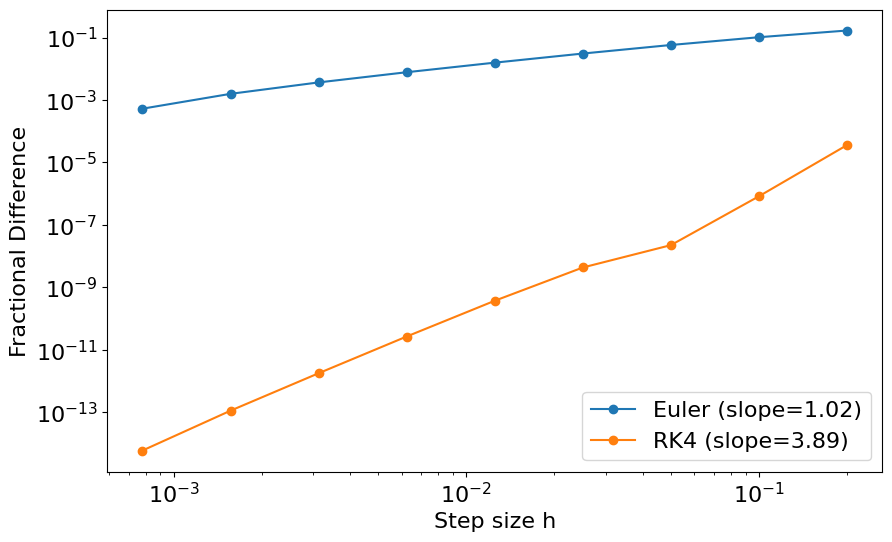

In [280]:
h_list = []
frac_err_euler = []
frac_err_rk4 = []
result_euler=[]
result_rk4=[]
for i in range(10):
    h_val = 0.2 / 2**i
    h_list.append(h_val)

for h in h_list:
    n = int((xf - x0)/h)
    x2, y2 = euler(x0, y0, h, n, func)
    x3, y3 = rk4(x0, y0, h, n, func)
    result_euler.append(y2[-1])
    result_rk4.append(y3[-1])
    

for i in range(len(h_list)):
    err_euler = np.abs((result_euler[i]-result_euler[-1])/(result_euler[-1]))
    err_rk4 = np.abs((result_rk4[i]-result_rk4[-1])/(result_rk4[-1]))
    frac_err_euler.append(err_euler)
    frac_err_rk4.append(err_rk4)


#print(frac_err_euler)
#print(frac_err_rk4)

h_arr = np.array(h_list)
frac_eu_arr = np.array(frac_err_euler)
frac_rk_arr = np.array(frac_err_rk4)

plt.loglog(h_list[:-1], frac_err_euler[:-1], '-o', label=f'Euler (slope={slope_eu[0]:.2f})')
plt.loglog(h_list[:-1], frac_err_rk4[:-1], '-o', label=f'RK4 (slope={slope_rk[0]:.2f})')

plt.xlabel('Step size h')
plt.ylabel('Fractional Difference')
plt.legend()

slope_eu = np.polyfit(np.log(h_list[:-1]), np.log(frac_err_euler[:-1]), 1)
slope_rk = np.polyfit(np.log(h_list[:-1]), np.log(frac_err_rk4[:-1]), 1)

print(f"Euler slope: {slope_eu[0]:.2f}")
print(f"RK4 slope: {slope_rk[0]:.2f}")

In [281]:
# difference between two finest runs
conv_estimate = abs(result_euler[-1] - result_euler[-2]) / abs(result_euler[-1])

# actual error against exact
true_error = abs(result_euler[-1] - exact_y(xf)) / abs(exact_y(xf))

print(f"Convergence estimate: {conv_estimate:.2e}")
print(f"True error:           {true_error:.2e}")

Convergence estimate: 5.27e-04
True error:           5.28e-04
